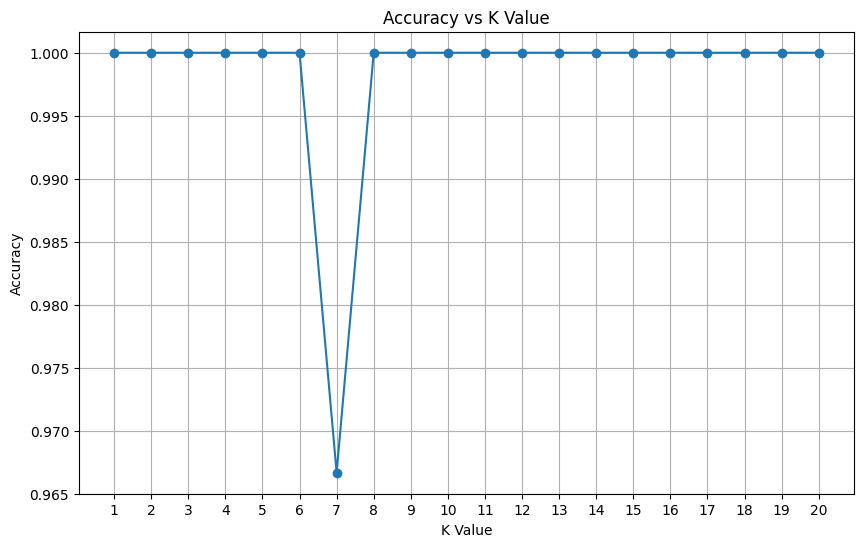


Optimal K value: 1

Accuracy: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


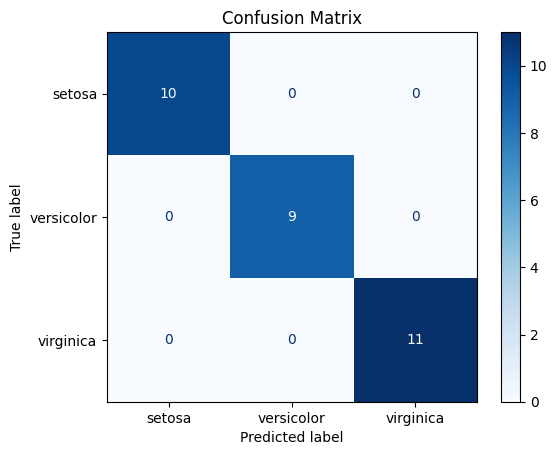


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix,
                           classification_report, ConfusionMatrixDisplay)
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('iris.csv')

# Separate features and target
X = data.drop('species', axis=1)
y = data['species']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find the optimal k value
accuracy = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracy, marker='o')
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.grid()
plt.show()

# Choose the best k (highest accuracy)
optimal_k = np.argmax(accuracy) + 1  # +1 because range starts at 1
print(f"\nOptimal K value: {optimal_k}")

# Train the final model with optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

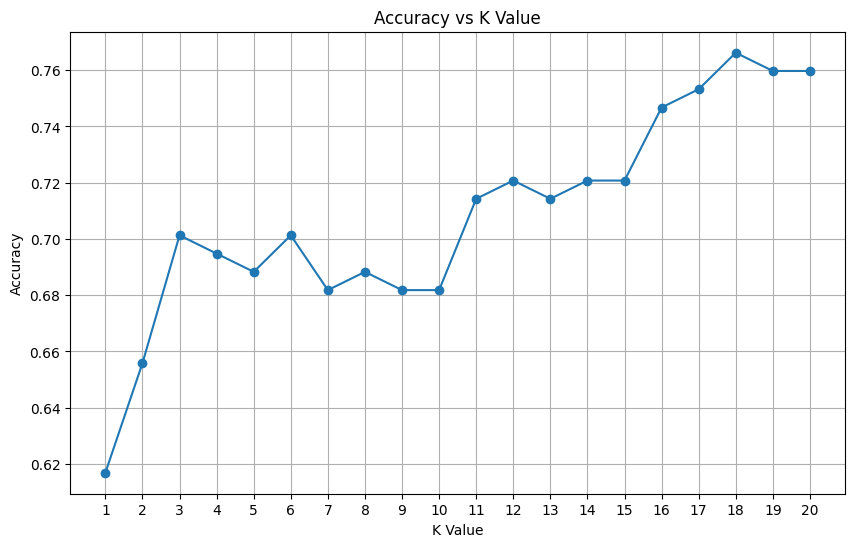

Optimal K value: 18

Accuracy: 0.7662

Confusion Matrix:
[[89 10]
 [26 29]]


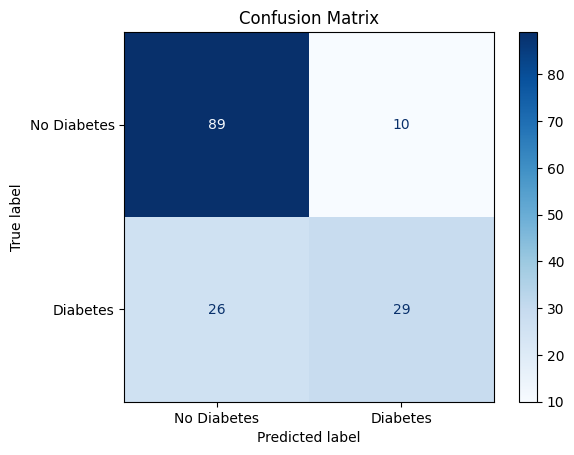


Model Evaluation:
- True Positives: 29
- True Negatives: 89
- False Positives: 10
- False Negatives: 26


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Find the optimal k value
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

# Choose the best k (highest accuracy)
optimal_k = k_values[np.argmax(accuracy_scores)]
print(f"Optimal K value: {optimal_k}")

# Train the final model with optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Feature importance (based on model performance)
print("\nModel Evaluation:")
print(f"- True Positives: {cm[1,1]}")
print(f"- True Negatives: {cm[0,0]}")
print(f"- False Positives: {cm[0,1]}")
print(f"- False Negatives: {cm[1,0]}")